# UDiffSE demo

In [1]:
# ======== ipynb settings =======
%load_ext autoreload
%autoreload 2

import IPython
from src.utils import show_spec
from src.enhancement import UDiffSE

No ROCm runtime is found, using ROCM_HOME='/opt/rocm-4.5.0'


## Global parameter settings

In [2]:
# Checkpoint's path
ckpt_path = "data/checkpoints/diffusion_gen_nonlinear_transform.ckpt"

# Test speech
noisy_path = "data/test_speech/x.wav"
clean_path = "data/test_speech/s.wav"

num_E = 30  # Number of E-step iterations (reverse diffusion process)
verbose = True

udiffse = UDiffSE(ckpt_path=ckpt_path, num_E=num_E, verbose=verbose)

## Sampling from clean speech prior

100%|█████████████████████████████████████████████████████████████████████| 30/30 [00:12<00:00,  2.50it/s]


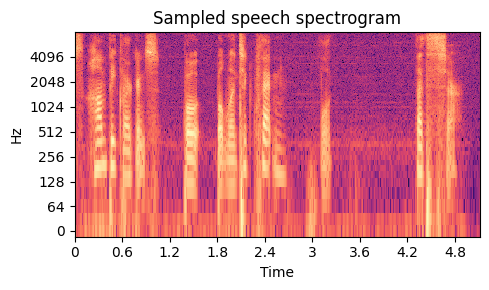

In [3]:
s_clean, S_clean = udiffse.prior_sampler()

show_spec(spectogram=[S_clean], titles=["Sampled speech spectrogram"])
IPython.display.display(IPython.display.Audio(s_clean, rate=16000))

## UDiffSE

Input PESQ: 2.0102 --- SI-SDR: -1.8835 --- ESTOI: 0.5499


100%|█████████████████████████████████████████████████████████████████████| 30/30 [00:18<00:00,  1.60it/s]


0/5 PESQ: 1.5292 --- SI-SDR: -3.2411 --- ESTOI: 0.2826


100%|█████████████████████████████████████████████████████████████████████| 30/30 [00:18<00:00,  1.60it/s]


1/5 PESQ: 1.9410 --- SI-SDR: 2.0521 --- ESTOI: 0.5005


100%|█████████████████████████████████████████████████████████████████████| 30/30 [00:18<00:00,  1.59it/s]


2/5 PESQ: 2.2571 --- SI-SDR: 4.4008 --- ESTOI: 0.6720


100%|█████████████████████████████████████████████████████████████████████| 30/30 [00:18<00:00,  1.58it/s]


3/5 PESQ: 2.3679 --- SI-SDR: 4.8220 --- ESTOI: 0.6930


100%|█████████████████████████████████████████████████████████████████████| 30/30 [00:19<00:00,  1.57it/s]


4/5 PESQ: 2.2948 --- SI-SDR: 5.1907 --- ESTOI: 0.6834
Clean speech


Noisy speech


Estimated speech


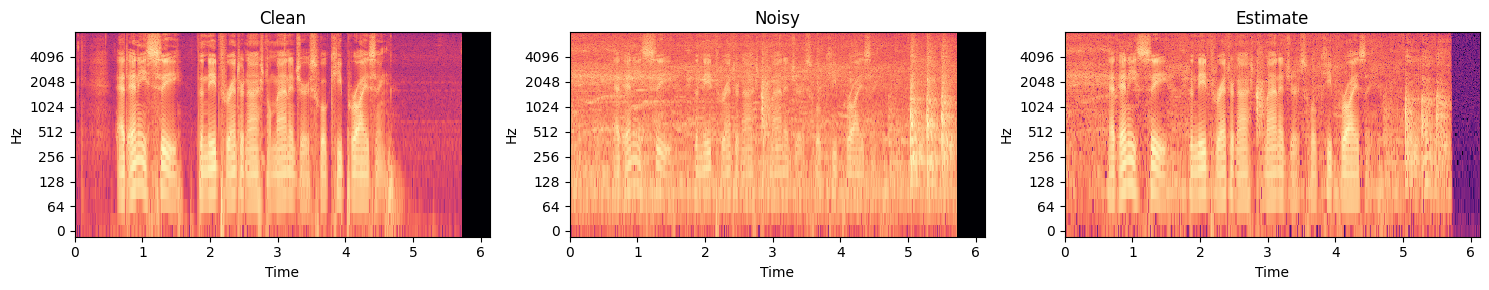

In [4]:
# Run speech enhancement
s_est, S_est = udiffse.run(
    mix_file=noisy_path,
    clean_file=clean_path,
    num_EM=5,
    nbatch=2,
    nmf_rank=4,
)

# Show spectrograms and play audio
show_spec(
    spectogram=[udiffse.S_ref, udiffse.X.mean(0), S_est],
    titles=["Clean", "Noisy", "Estimate"],
)

print("Clean speech")
IPython.display.display(IPython.display.Audio(udiffse.s_ref, rate=16000))
print("Noisy speech")
IPython.display.display(IPython.display.Audio(udiffse.x, rate=16000))
print("Estimated speech")
IPython.display.display(IPython.display.Audio(s_est, rate=16000))